In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-mumu-mZ4500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-4500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-4500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-4500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-4500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-4500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-4500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-4500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-4500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-4500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-4500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-4500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-4500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

728916
728527


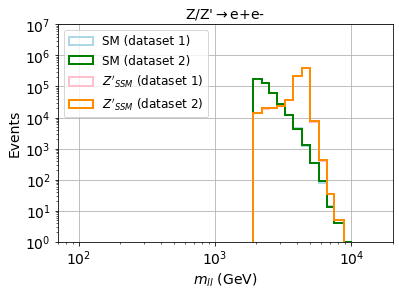

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/mumu/"

invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 2)")


folder_saved = "Zprime-SSM-mumu-mZ4500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/mumu/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.65 or e1eta_eeSM[i] > 2.65 or e2eta_eeSM[i] < -2.65 or e2eta_eeSM[i] > 2.65:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800_2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800_2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800_2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800_2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800_2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800_2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.65 or e1eta_eeSM_1800[i] > 2.65 or e2eta_eeSM_1800[i] < -2.65 or e2eta_eeSM_1800[i] > 2.65:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800




# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.646
2.648
-2.649
2.649


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-mumu-mZ4500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-4500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-4500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-4500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-4500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-4500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-4500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.65 or e1eta_eeSSMZprime[i] > 2.65 or e2eta_eeSSMZprime[i] < -2.65 or e2eta_eeSSMZprime[i] > 2.65:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)

        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-4500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-4500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-4500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-4500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-4500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-4500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.65 or e1eta_eeSSMZprime_2[i] > 2.65 or e2eta_eeSSMZprime_2[i] < -2.65 or e2eta_eeSSMZprime_2[i] > 2.65:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2








# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.72851
(1457399,)
(1457399,)
(1457399,)
(1457399,)
(1457399,)
(1457399,)
(1457399,)
(1457399,)
(1457399,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.639
2.621
-2.649
2.649


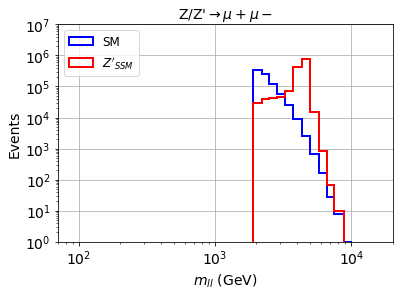

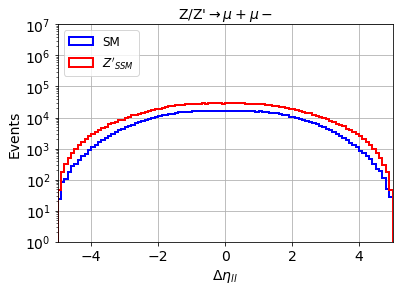

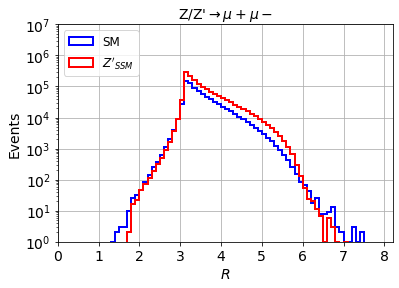

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.226030  0.591235  0.081158  0.286204  0.609664  0.557288  0.039780   
1        0.220633  0.636759  0.312540  0.272247  0.353341  0.827976  0.121861   
2        0.298314  0.703627  0.972311  0.356583  0.502831  0.473265  0.181610   
3        0.207704  0.581224  0.581158  0.238788  0.567573  0.101528  0.002850   
4        0.183792  0.544012  0.273711  0.248309  0.285957  0.765595  0.061335   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.236315  0.405176  0.156906  0.299346  0.875991  0.658020  0.351986   
1499996  0.446634  0.373064  0.456397  0.532956  0.508116  0.957352  0.347140   
1499997  0.197497  0.609180  0.203215  0.259828  0.090978  0.698600  0.330489   
1499998  0.430872  0.350019  0.570178  0.517920  0.522650  0.064290  0.352050   
1499999  0.265877  0.264828  0.236951  0.316848  0.724236  0.733927  0.386443   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63587	validation_1-logloss:0.63589
[1]	validation_0-logloss:0.58867	validation_1-logloss:0.58874
[2]	validation_0-logloss:0.54931	validation_1-logloss:0.54929
[3]	validation_0-logloss:0.51553	validation_1-logloss:0.51551
[4]	validation_0-logloss:0.48430	validation_1-logloss:0.48440
[5]	validation_0-logloss:0.45850	validation_1-logloss:0.45860
[6]	validation_0-logloss:0.43568	validation_1-logloss:0.43585
[7]	validation_0-logloss:0.41654	validation_1-logloss:0.41677
[8]	validation_0-logloss:0.40014	validation_1-logloss:0.40043
[9]	validation_0-logloss:0.38475	validation_1-logloss:0.38514
[10]	validation_0-logloss:0.37077	validation_1-logloss:0.37110
[11]	validation_0-logloss:0.35889	validation_1-logloss:0.35928
[12]	validation_0-logloss:0.34885	validation_1-logloss:0.34926
[13]	validation_0-logloss:0.33906	validation_1-logloss:0.33956
[14]	validation_0-logloss:0.32877	validation_1-logloss:0.32936
[15]	validation_0-logloss:0.32049	validation_1-logloss:0.32098
[1

[130]	validation_0-logloss:0.21340	validation_1-logloss:0.21626
[131]	validation_0-logloss:0.21335	validation_1-logloss:0.21624
[132]	validation_0-logloss:0.21331	validation_1-logloss:0.21621
[133]	validation_0-logloss:0.21328	validation_1-logloss:0.21620
[134]	validation_0-logloss:0.21326	validation_1-logloss:0.21619
[135]	validation_0-logloss:0.21323	validation_1-logloss:0.21618
[136]	validation_0-logloss:0.21320	validation_1-logloss:0.21617
[137]	validation_0-logloss:0.21319	validation_1-logloss:0.21617
[138]	validation_0-logloss:0.21316	validation_1-logloss:0.21618
[139]	validation_0-logloss:0.21314	validation_1-logloss:0.21617
[140]	validation_0-logloss:0.21312	validation_1-logloss:0.21616
[141]	validation_0-logloss:0.21309	validation_1-logloss:0.21615
[142]	validation_0-logloss:0.21307	validation_1-logloss:0.21615
[143]	validation_0-logloss:0.21302	validation_1-logloss:0.21611
[144]	validation_0-logloss:0.21300	validation_1-logloss:0.21611
[145]	validation_0-logloss:0.21298	valid

[259]	validation_0-logloss:0.21054	validation_1-logloss:0.21551
[260]	validation_0-logloss:0.21053	validation_1-logloss:0.21551
[261]	validation_0-logloss:0.21052	validation_1-logloss:0.21550
[262]	validation_0-logloss:0.21051	validation_1-logloss:0.21550
[263]	validation_0-logloss:0.21050	validation_1-logloss:0.21551
[264]	validation_0-logloss:0.21047	validation_1-logloss:0.21551
[265]	validation_0-logloss:0.21046	validation_1-logloss:0.21551
[266]	validation_0-logloss:0.21046	validation_1-logloss:0.21551
[267]	validation_0-logloss:0.21045	validation_1-logloss:0.21551
[268]	validation_0-logloss:0.21042	validation_1-logloss:0.21550
[269]	validation_0-logloss:0.21040	validation_1-logloss:0.21550
[270]	validation_0-logloss:0.21038	validation_1-logloss:0.21549
[271]	validation_0-logloss:0.21036	validation_1-logloss:0.21549
[272]	validation_0-logloss:0.21035	validation_1-logloss:0.21549
[273]	validation_0-logloss:0.21033	validation_1-logloss:0.21548
[274]	validation_0-logloss:0.21033	valid

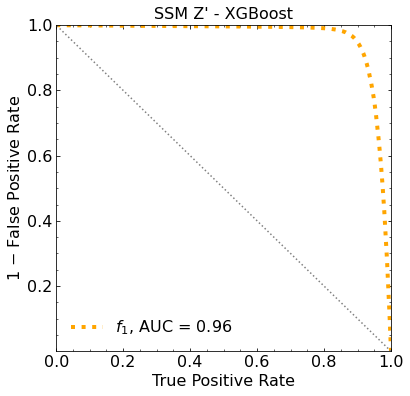

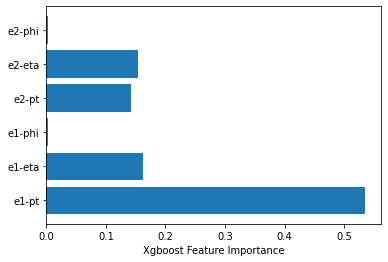

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63615	validation_1-logloss:0.63622
[1]	validation_0-logloss:0.58908	validation_1-logloss:0.58917
[2]	validation_0-logloss:0.54969	validation_1-logloss:0.54965
[3]	validation_0-logloss:0.51523	validation_1-logloss:0.51551
[4]	validation_0-logloss:0.48634	validation_1-logloss:0.48660
[5]	validation_0-logloss:0.46073	validation_1-logloss:0.46098
[6]	validation_0-logloss:0.43797	validation_1-logloss:0.43824
[7]	validation_0-logloss:0.41838	validation_1-logloss:0.41866
[8]	validation_0-logloss:0.40147	validation_1-logloss:0.40177
[9]	validation_0-logloss:0.38642	validation_1-logloss:0.38672
[10]	validation_0-logloss:0.37287	validation_1-logloss:0.37322
[11]	validation_0-logloss:0.36048	validation_1-logloss:0.36097
[12]	validation_0-logloss:0.34935	validation_1-logloss:0.34984
[13]	validation_0-logloss:0.33776	validation_1-logloss:0.33840
[14]	validation_0-logloss:0.32880	validation_1-logloss:0.32951
[15]	validation_0-logloss:0.31956	validation_1-logloss:0.32026
[1

[130]	validation_0-logloss:0.21107	validation_1-logloss:0.21634
[131]	validation_0-logloss:0.21101	validation_1-logloss:0.21633
[132]	validation_0-logloss:0.21098	validation_1-logloss:0.21632
[133]	validation_0-logloss:0.21088	validation_1-logloss:0.21627
[134]	validation_0-logloss:0.21083	validation_1-logloss:0.21627
[135]	validation_0-logloss:0.21080	validation_1-logloss:0.21627
[136]	validation_0-logloss:0.21076	validation_1-logloss:0.21626
[137]	validation_0-logloss:0.21071	validation_1-logloss:0.21624
[138]	validation_0-logloss:0.21069	validation_1-logloss:0.21623
[139]	validation_0-logloss:0.21066	validation_1-logloss:0.21622
[140]	validation_0-logloss:0.21056	validation_1-logloss:0.21617
[141]	validation_0-logloss:0.21052	validation_1-logloss:0.21616
[142]	validation_0-logloss:0.21047	validation_1-logloss:0.21616
[143]	validation_0-logloss:0.21044	validation_1-logloss:0.21615
[144]	validation_0-logloss:0.21040	validation_1-logloss:0.21615
[145]	validation_0-logloss:0.21037	valid

[259]	validation_0-logloss:0.20702	validation_1-logloss:0.21590
[260]	validation_0-logloss:0.20699	validation_1-logloss:0.21590
[261]	validation_0-logloss:0.20696	validation_1-logloss:0.21591
[262]	validation_0-logloss:0.20694	validation_1-logloss:0.21590
[263]	validation_0-logloss:0.20692	validation_1-logloss:0.21591
[264]	validation_0-logloss:0.20691	validation_1-logloss:0.21591
[265]	validation_0-logloss:0.20691	validation_1-logloss:0.21591
[266]	validation_0-logloss:0.20688	validation_1-logloss:0.21592
[267]	validation_0-logloss:0.20683	validation_1-logloss:0.21592
[268]	validation_0-logloss:0.20681	validation_1-logloss:0.21592
[269]	validation_0-logloss:0.20681	validation_1-logloss:0.21592
[270]	validation_0-logloss:0.20678	validation_1-logloss:0.21592
[271]	validation_0-logloss:0.20677	validation_1-logloss:0.21592
[272]	validation_0-logloss:0.20672	validation_1-logloss:0.21591
[273]	validation_0-logloss:0.20670	validation_1-logloss:0.21591
[274]	validation_0-logloss:0.20666	valid

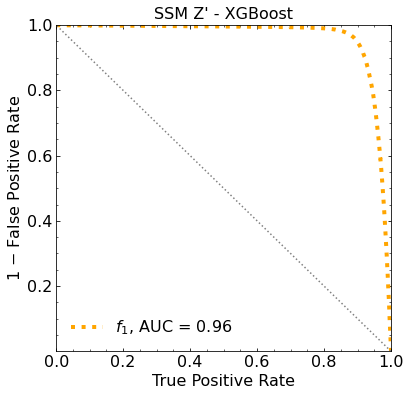


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63619	validation_1-logloss:0.63616
[1]	validation_0-logloss:0.58846	validation_1-logloss:0.58846
[2]	validation_0-logloss:0.54840	validation_1-logloss:0.54824
[3]	validation_0-logloss:0.51469	validation_1-logloss:0.51445
[4]	validation_0-logloss:0.48541	validation_1-logloss:0.48526
[5]	validation_0-logloss:0.45960	validation_1-logloss:0.45942
[6]	validation_0-logloss:0.43718	validation_1-logloss:0.43706
[7]	validation_0-logloss:0.41819	validation_1-logloss:0.41806
[8]	validation_0-logloss:0.40085	validation_1-logloss:0.40079
[9]	validation_0-logloss:0.38620	validation_1-logloss:0.38615
[10]	validation_0-logloss:0.37284	validation_1-logloss:0.37280
[11]	validation_0-logloss:0.35903	validation_1-logloss:0.35914
[12]	validation_0-logloss:0.34855	validation_1-logloss:0.34867
[13]	validation_0-logloss:0.33702	validation_1-logloss:0.33728
[14]	validation_0-logloss:0.32778	validation_1-logloss:0.32810
[15]	validation_0-logloss:0.32027	validation_1-logloss:0.32062
[1

[130]	validation_0-logloss:0.21190	validation_1-logloss:0.21628
[131]	validation_0-logloss:0.21186	validation_1-logloss:0.21627
[132]	validation_0-logloss:0.21178	validation_1-logloss:0.21624
[133]	validation_0-logloss:0.21176	validation_1-logloss:0.21623
[134]	validation_0-logloss:0.21172	validation_1-logloss:0.21623
[135]	validation_0-logloss:0.21168	validation_1-logloss:0.21621
[136]	validation_0-logloss:0.21163	validation_1-logloss:0.21620
[137]	validation_0-logloss:0.21159	validation_1-logloss:0.21619
[138]	validation_0-logloss:0.21156	validation_1-logloss:0.21619
[139]	validation_0-logloss:0.21155	validation_1-logloss:0.21618
[140]	validation_0-logloss:0.21146	validation_1-logloss:0.21614
[141]	validation_0-logloss:0.21141	validation_1-logloss:0.21611
[142]	validation_0-logloss:0.21136	validation_1-logloss:0.21611
[143]	validation_0-logloss:0.21132	validation_1-logloss:0.21610
[144]	validation_0-logloss:0.21130	validation_1-logloss:0.21610
[145]	validation_0-logloss:0.21126	valid

[259]	validation_0-logloss:0.20749	validation_1-logloss:0.21580
[260]	validation_0-logloss:0.20748	validation_1-logloss:0.21580
[261]	validation_0-logloss:0.20747	validation_1-logloss:0.21580
[262]	validation_0-logloss:0.20746	validation_1-logloss:0.21581
[263]	validation_0-logloss:0.20745	validation_1-logloss:0.21581
[264]	validation_0-logloss:0.20744	validation_1-logloss:0.21581
[265]	validation_0-logloss:0.20741	validation_1-logloss:0.21581
[266]	validation_0-logloss:0.20739	validation_1-logloss:0.21581
[267]	validation_0-logloss:0.20735	validation_1-logloss:0.21582
[268]	validation_0-logloss:0.20733	validation_1-logloss:0.21582
[269]	validation_0-logloss:0.20729	validation_1-logloss:0.21582
[270]	validation_0-logloss:0.20727	validation_1-logloss:0.21582
[271]	validation_0-logloss:0.20724	validation_1-logloss:0.21582
[272]	validation_0-logloss:0.20724	validation_1-logloss:0.21582
[273]	validation_0-logloss:0.20724	validation_1-logloss:0.21582
[274]	validation_0-logloss:0.20720	valid

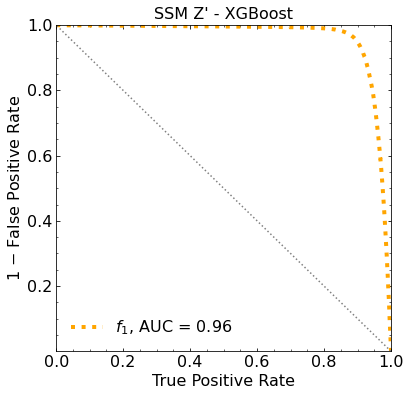


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63614	validation_1-logloss:0.63610
[1]	validation_0-logloss:0.58865	validation_1-logloss:0.58864
[2]	validation_0-logloss:0.54887	validation_1-logloss:0.54892
[3]	validation_0-logloss:0.51487	validation_1-logloss:0.51504
[4]	validation_0-logloss:0.48528	validation_1-logloss:0.48546
[5]	validation_0-logloss:0.46019	validation_1-logloss:0.46046
[6]	validation_0-logloss:0.43750	validation_1-logloss:0.43788
[7]	validation_0-logloss:0.41831	validation_1-logloss:0.41860
[8]	validation_0-logloss:0.40131	validation_1-logloss:0.40165
[9]	validation_0-logloss:0.38571	validation_1-logloss:0.38612
[10]	validation_0-logloss:0.37349	validation_1-logloss:0.37397
[11]	validation_0-logloss:0.35916	validation_1-logloss:0.35970
[12]	validation_0-logloss:0.34843	validation_1-logloss:0.34897
[13]	validation_0-logloss:0.33687	validation_1-logloss:0.33753
[14]	validation_0-logloss:0.32660	validation_1-logloss:0.32734
[15]	validation_0-logloss:0.31861	validation_1-logloss:0.31941
[1

[130]	validation_0-logloss:0.21199	validation_1-logloss:0.21687
[131]	validation_0-logloss:0.21195	validation_1-logloss:0.21685
[132]	validation_0-logloss:0.21192	validation_1-logloss:0.21685
[133]	validation_0-logloss:0.21190	validation_1-logloss:0.21684
[134]	validation_0-logloss:0.21185	validation_1-logloss:0.21684
[135]	validation_0-logloss:0.21181	validation_1-logloss:0.21684
[136]	validation_0-logloss:0.21178	validation_1-logloss:0.21684
[137]	validation_0-logloss:0.21166	validation_1-logloss:0.21675
[138]	validation_0-logloss:0.21162	validation_1-logloss:0.21675
[139]	validation_0-logloss:0.21159	validation_1-logloss:0.21675
[140]	validation_0-logloss:0.21156	validation_1-logloss:0.21674
[141]	validation_0-logloss:0.21153	validation_1-logloss:0.21674
[142]	validation_0-logloss:0.21149	validation_1-logloss:0.21674
[143]	validation_0-logloss:0.21142	validation_1-logloss:0.21671
[144]	validation_0-logloss:0.21137	validation_1-logloss:0.21671
[145]	validation_0-logloss:0.21134	valid

[259]	validation_0-logloss:0.20771	validation_1-logloss:0.21629
[260]	validation_0-logloss:0.20770	validation_1-logloss:0.21629
[261]	validation_0-logloss:0.20769	validation_1-logloss:0.21629
[262]	validation_0-logloss:0.20769	validation_1-logloss:0.21629
[263]	validation_0-logloss:0.20764	validation_1-logloss:0.21628
[264]	validation_0-logloss:0.20761	validation_1-logloss:0.21629
[265]	validation_0-logloss:0.20757	validation_1-logloss:0.21629
[266]	validation_0-logloss:0.20755	validation_1-logloss:0.21629
[267]	validation_0-logloss:0.20751	validation_1-logloss:0.21629
[268]	validation_0-logloss:0.20746	validation_1-logloss:0.21630
[269]	validation_0-logloss:0.20741	validation_1-logloss:0.21627
[270]	validation_0-logloss:0.20738	validation_1-logloss:0.21627
[271]	validation_0-logloss:0.20735	validation_1-logloss:0.21627
[272]	validation_0-logloss:0.20732	validation_1-logloss:0.21627
[273]	validation_0-logloss:0.20728	validation_1-logloss:0.21628
[274]	validation_0-logloss:0.20726	valid

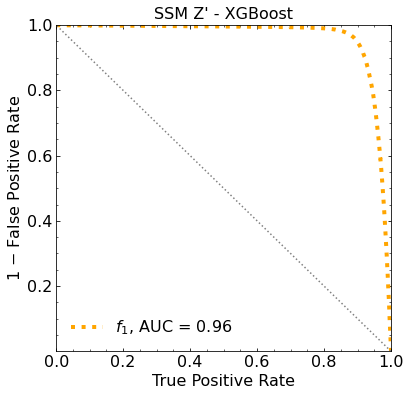


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63579	validation_1-logloss:0.63593
[1]	validation_0-logloss:0.58875	validation_1-logloss:0.58884
[2]	validation_0-logloss:0.54892	validation_1-logloss:0.54920
[3]	validation_0-logloss:0.51291	validation_1-logloss:0.51336
[4]	validation_0-logloss:0.48421	validation_1-logloss:0.48468
[5]	validation_0-logloss:0.45855	validation_1-logloss:0.45912
[6]	validation_0-logloss:0.43551	validation_1-logloss:0.43623
[7]	validation_0-logloss:0.41728	validation_1-logloss:0.41807
[8]	validation_0-logloss:0.40018	validation_1-logloss:0.40101
[9]	validation_0-logloss:0.38480	validation_1-logloss:0.38570
[10]	validation_0-logloss:0.37125	validation_1-logloss:0.37223
[11]	validation_0-logloss:0.35906	validation_1-logloss:0.36015
[12]	validation_0-logloss:0.34622	validation_1-logloss:0.34746
[13]	validation_0-logloss:0.33515	validation_1-logloss:0.33648
[14]	validation_0-logloss:0.32640	validation_1-logloss:0.32772
[15]	validation_0-logloss:0.31868	validation_1-logloss:0.32002
[1

[130]	validation_0-logloss:0.21091	validation_1-logloss:0.21675
[131]	validation_0-logloss:0.21087	validation_1-logloss:0.21674
[132]	validation_0-logloss:0.21082	validation_1-logloss:0.21672
[133]	validation_0-logloss:0.21079	validation_1-logloss:0.21672
[134]	validation_0-logloss:0.21074	validation_1-logloss:0.21671
[135]	validation_0-logloss:0.21070	validation_1-logloss:0.21671
[136]	validation_0-logloss:0.21061	validation_1-logloss:0.21666
[137]	validation_0-logloss:0.21057	validation_1-logloss:0.21666
[138]	validation_0-logloss:0.21053	validation_1-logloss:0.21666
[139]	validation_0-logloss:0.21050	validation_1-logloss:0.21666
[140]	validation_0-logloss:0.21047	validation_1-logloss:0.21665
[141]	validation_0-logloss:0.21044	validation_1-logloss:0.21665
[142]	validation_0-logloss:0.21041	validation_1-logloss:0.21665
[143]	validation_0-logloss:0.21034	validation_1-logloss:0.21662
[144]	validation_0-logloss:0.21028	validation_1-logloss:0.21661
[145]	validation_0-logloss:0.21024	valid

[259]	validation_0-logloss:0.20646	validation_1-logloss:0.21629
[260]	validation_0-logloss:0.20642	validation_1-logloss:0.21629
[261]	validation_0-logloss:0.20640	validation_1-logloss:0.21630
[262]	validation_0-logloss:0.20638	validation_1-logloss:0.21630
[263]	validation_0-logloss:0.20634	validation_1-logloss:0.21630
[264]	validation_0-logloss:0.20630	validation_1-logloss:0.21629
[265]	validation_0-logloss:0.20627	validation_1-logloss:0.21630
[266]	validation_0-logloss:0.20622	validation_1-logloss:0.21629
[267]	validation_0-logloss:0.20618	validation_1-logloss:0.21629
[268]	validation_0-logloss:0.20614	validation_1-logloss:0.21629
[269]	validation_0-logloss:0.20612	validation_1-logloss:0.21629
[270]	validation_0-logloss:0.20610	validation_1-logloss:0.21630
[271]	validation_0-logloss:0.20610	validation_1-logloss:0.21630
[272]	validation_0-logloss:0.20609	validation_1-logloss:0.21630
[273]	validation_0-logloss:0.20606	validation_1-logloss:0.21630
[274]	validation_0-logloss:0.20603	valid

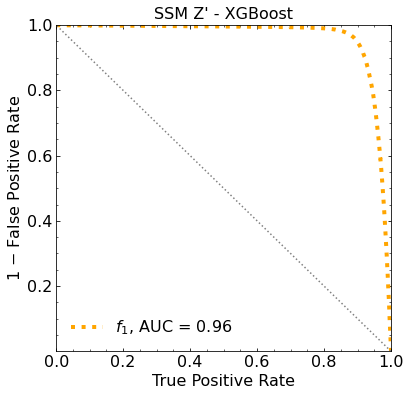


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63601	validation_1-logloss:0.63609
[1]	validation_0-logloss:0.58834	validation_1-logloss:0.58853
[2]	validation_0-logloss:0.54900	validation_1-logloss:0.54913
[3]	validation_0-logloss:0.51423	validation_1-logloss:0.51450
[4]	validation_0-logloss:0.48527	validation_1-logloss:0.48561
[5]	validation_0-logloss:0.46034	validation_1-logloss:0.46069
[6]	validation_0-logloss:0.43733	validation_1-logloss:0.43780
[7]	validation_0-logloss:0.41796	validation_1-logloss:0.41853
[8]	validation_0-logloss:0.40034	validation_1-logloss:0.40092
[9]	validation_0-logloss:0.38648	validation_1-logloss:0.38712
[10]	validation_0-logloss:0.37273	validation_1-logloss:0.37346
[11]	validation_0-logloss:0.36037	validation_1-logloss:0.36113
[12]	validation_0-logloss:0.34771	validation_1-logloss:0.34860
[13]	validation_0-logloss:0.33768	validation_1-logloss:0.33864
[14]	validation_0-logloss:0.32833	validation_1-logloss:0.32932
[15]	validation_0-logloss:0.31885	validation_1-logloss:0.31995
[1

[130]	validation_0-logloss:0.21117	validation_1-logloss:0.21646
[131]	validation_0-logloss:0.21114	validation_1-logloss:0.21646
[132]	validation_0-logloss:0.21111	validation_1-logloss:0.21646
[133]	validation_0-logloss:0.21104	validation_1-logloss:0.21642
[134]	validation_0-logloss:0.21101	validation_1-logloss:0.21642
[135]	validation_0-logloss:0.21099	validation_1-logloss:0.21641
[136]	validation_0-logloss:0.21094	validation_1-logloss:0.21641
[137]	validation_0-logloss:0.21088	validation_1-logloss:0.21641
[138]	validation_0-logloss:0.21080	validation_1-logloss:0.21638
[139]	validation_0-logloss:0.21079	validation_1-logloss:0.21638
[140]	validation_0-logloss:0.21075	validation_1-logloss:0.21638
[141]	validation_0-logloss:0.21071	validation_1-logloss:0.21635
[142]	validation_0-logloss:0.21067	validation_1-logloss:0.21635
[143]	validation_0-logloss:0.21063	validation_1-logloss:0.21636
[144]	validation_0-logloss:0.21060	validation_1-logloss:0.21636
[145]	validation_0-logloss:0.21057	valid

[259]	validation_0-logloss:0.20670	validation_1-logloss:0.21598
[260]	validation_0-logloss:0.20667	validation_1-logloss:0.21598
[261]	validation_0-logloss:0.20666	validation_1-logloss:0.21598
[262]	validation_0-logloss:0.20664	validation_1-logloss:0.21599
[263]	validation_0-logloss:0.20663	validation_1-logloss:0.21599
[264]	validation_0-logloss:0.20658	validation_1-logloss:0.21598
[265]	validation_0-logloss:0.20655	validation_1-logloss:0.21596
[266]	validation_0-logloss:0.20650	validation_1-logloss:0.21595
[267]	validation_0-logloss:0.20648	validation_1-logloss:0.21596
[268]	validation_0-logloss:0.20644	validation_1-logloss:0.21596
[269]	validation_0-logloss:0.20642	validation_1-logloss:0.21596
[270]	validation_0-logloss:0.20642	validation_1-logloss:0.21596
[271]	validation_0-logloss:0.20639	validation_1-logloss:0.21596
[272]	validation_0-logloss:0.20634	validation_1-logloss:0.21597
[273]	validation_0-logloss:0.20633	validation_1-logloss:0.21597
[274]	validation_0-logloss:0.20630	valid

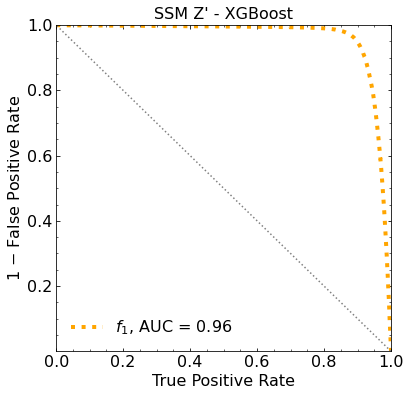


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63572	validation_1-logloss:0.63581
[1]	validation_0-logloss:0.58793	validation_1-logloss:0.58810
[2]	validation_0-logloss:0.54876	validation_1-logloss:0.54895
[3]	validation_0-logloss:0.51497	validation_1-logloss:0.51524
[4]	validation_0-logloss:0.48508	validation_1-logloss:0.48545
[5]	validation_0-logloss:0.45928	validation_1-logloss:0.45966
[6]	validation_0-logloss:0.43726	validation_1-logloss:0.43770
[7]	validation_0-logloss:0.41763	validation_1-logloss:0.41806
[8]	validation_0-logloss:0.40093	validation_1-logloss:0.40142
[9]	validation_0-logloss:0.38559	validation_1-logloss:0.38615
[10]	validation_0-logloss:0.37256	validation_1-logloss:0.37307
[11]	validation_0-logloss:0.36006	validation_1-logloss:0.36068
[12]	validation_0-logloss:0.34696	validation_1-logloss:0.34762
[13]	validation_0-logloss:0.33715	validation_1-logloss:0.33780
[14]	validation_0-logloss:0.32676	validation_1-logloss:0.32748
[15]	validation_0-logloss:0.31903	validation_1-logloss:0.31986
[1

[130]	validation_0-logloss:0.21172	validation_1-logloss:0.21658
[131]	validation_0-logloss:0.21168	validation_1-logloss:0.21658
[132]	validation_0-logloss:0.21164	validation_1-logloss:0.21658
[133]	validation_0-logloss:0.21160	validation_1-logloss:0.21657
[134]	validation_0-logloss:0.21153	validation_1-logloss:0.21655
[135]	validation_0-logloss:0.21151	validation_1-logloss:0.21656
[136]	validation_0-logloss:0.21144	validation_1-logloss:0.21653
[137]	validation_0-logloss:0.21140	validation_1-logloss:0.21653
[138]	validation_0-logloss:0.21136	validation_1-logloss:0.21653
[139]	validation_0-logloss:0.21130	validation_1-logloss:0.21652
[140]	validation_0-logloss:0.21125	validation_1-logloss:0.21650
[141]	validation_0-logloss:0.21122	validation_1-logloss:0.21649
[142]	validation_0-logloss:0.21119	validation_1-logloss:0.21649
[143]	validation_0-logloss:0.21115	validation_1-logloss:0.21650
[144]	validation_0-logloss:0.21107	validation_1-logloss:0.21646
[145]	validation_0-logloss:0.21104	valid

[259]	validation_0-logloss:0.20743	validation_1-logloss:0.21624
[260]	validation_0-logloss:0.20742	validation_1-logloss:0.21624
[261]	validation_0-logloss:0.20740	validation_1-logloss:0.21624
[262]	validation_0-logloss:0.20739	validation_1-logloss:0.21624
[263]	validation_0-logloss:0.20736	validation_1-logloss:0.21624
[264]	validation_0-logloss:0.20736	validation_1-logloss:0.21624
[265]	validation_0-logloss:0.20734	validation_1-logloss:0.21624
[266]	validation_0-logloss:0.20733	validation_1-logloss:0.21625
[267]	validation_0-logloss:0.20730	validation_1-logloss:0.21624
[268]	validation_0-logloss:0.20729	validation_1-logloss:0.21624
[269]	validation_0-logloss:0.20728	validation_1-logloss:0.21625
[270]	validation_0-logloss:0.20722	validation_1-logloss:0.21624
[271]	validation_0-logloss:0.20718	validation_1-logloss:0.21624
[272]	validation_0-logloss:0.20714	validation_1-logloss:0.21624
[273]	validation_0-logloss:0.20712	validation_1-logloss:0.21623
[274]	validation_0-logloss:0.20711	valid

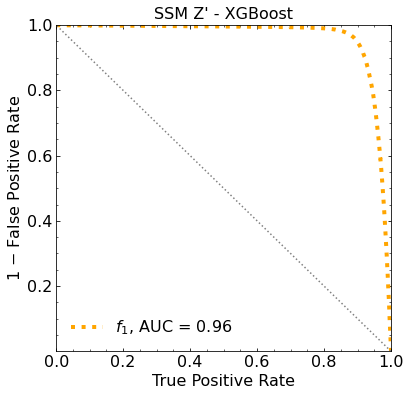


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63556	validation_1-logloss:0.63580
[1]	validation_0-logloss:0.58812	validation_1-logloss:0.58842
[2]	validation_0-logloss:0.54892	validation_1-logloss:0.54916
[3]	validation_0-logloss:0.51396	validation_1-logloss:0.51436
[4]	validation_0-logloss:0.48256	validation_1-logloss:0.48305
[5]	validation_0-logloss:0.45748	validation_1-logloss:0.45804
[6]	validation_0-logloss:0.43556	validation_1-logloss:0.43627
[7]	validation_0-logloss:0.41598	validation_1-logloss:0.41683
[8]	validation_0-logloss:0.39896	validation_1-logloss:0.39984
[9]	validation_0-logloss:0.38364	validation_1-logloss:0.38463
[10]	validation_0-logloss:0.37072	validation_1-logloss:0.37172
[11]	validation_0-logloss:0.35856	validation_1-logloss:0.35965
[12]	validation_0-logloss:0.34591	validation_1-logloss:0.34709
[13]	validation_0-logloss:0.33629	validation_1-logloss:0.33748
[14]	validation_0-logloss:0.32607	validation_1-logloss:0.32737
[15]	validation_0-logloss:0.31787	validation_1-logloss:0.31930
[1

[130]	validation_0-logloss:0.21023	validation_1-logloss:0.21677
[131]	validation_0-logloss:0.21018	validation_1-logloss:0.21676
[132]	validation_0-logloss:0.21014	validation_1-logloss:0.21674
[133]	validation_0-logloss:0.21009	validation_1-logloss:0.21673
[134]	validation_0-logloss:0.21000	validation_1-logloss:0.21669
[135]	validation_0-logloss:0.20996	validation_1-logloss:0.21668
[136]	validation_0-logloss:0.20993	validation_1-logloss:0.21668
[137]	validation_0-logloss:0.20988	validation_1-logloss:0.21667
[138]	validation_0-logloss:0.20985	validation_1-logloss:0.21666
[139]	validation_0-logloss:0.20982	validation_1-logloss:0.21664
[140]	validation_0-logloss:0.20976	validation_1-logloss:0.21663
[141]	validation_0-logloss:0.20973	validation_1-logloss:0.21663
[142]	validation_0-logloss:0.20969	validation_1-logloss:0.21664
[143]	validation_0-logloss:0.20964	validation_1-logloss:0.21663
[144]	validation_0-logloss:0.20962	validation_1-logloss:0.21662
[145]	validation_0-logloss:0.20958	valid

[259]	validation_0-logloss:0.20592	validation_1-logloss:0.21608
[260]	validation_0-logloss:0.20591	validation_1-logloss:0.21608
[261]	validation_0-logloss:0.20590	validation_1-logloss:0.21609
[262]	validation_0-logloss:0.20587	validation_1-logloss:0.21608
[263]	validation_0-logloss:0.20585	validation_1-logloss:0.21608
[264]	validation_0-logloss:0.20584	validation_1-logloss:0.21608
[265]	validation_0-logloss:0.20582	validation_1-logloss:0.21609
[266]	validation_0-logloss:0.20578	validation_1-logloss:0.21609
[267]	validation_0-logloss:0.20574	validation_1-logloss:0.21609
[268]	validation_0-logloss:0.20571	validation_1-logloss:0.21609
[269]	validation_0-logloss:0.20567	validation_1-logloss:0.21610
[270]	validation_0-logloss:0.20564	validation_1-logloss:0.21610
[271]	validation_0-logloss:0.20560	validation_1-logloss:0.21610
[272]	validation_0-logloss:0.20558	validation_1-logloss:0.21610
[273]	validation_0-logloss:0.20554	validation_1-logloss:0.21610
[274]	validation_0-logloss:0.20551	valid

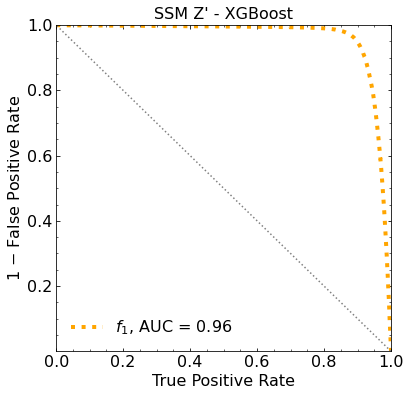


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63607	validation_1-logloss:0.63612
[1]	validation_0-logloss:0.58849	validation_1-logloss:0.58868
[2]	validation_0-logloss:0.54699	validation_1-logloss:0.54719
[3]	validation_0-logloss:0.51268	validation_1-logloss:0.51305
[4]	validation_0-logloss:0.48389	validation_1-logloss:0.48425
[5]	validation_0-logloss:0.45798	validation_1-logloss:0.45842
[6]	validation_0-logloss:0.43546	validation_1-logloss:0.43588
[7]	validation_0-logloss:0.41628	validation_1-logloss:0.41679
[8]	validation_0-logloss:0.39934	validation_1-logloss:0.39998
[9]	validation_0-logloss:0.38414	validation_1-logloss:0.38480
[10]	validation_0-logloss:0.37085	validation_1-logloss:0.37147
[11]	validation_0-logloss:0.35867	validation_1-logloss:0.35937
[12]	validation_0-logloss:0.34771	validation_1-logloss:0.34848
[13]	validation_0-logloss:0.33638	validation_1-logloss:0.33719
[14]	validation_0-logloss:0.32668	validation_1-logloss:0.32755
[15]	validation_0-logloss:0.31758	validation_1-logloss:0.31854
[1

[130]	validation_0-logloss:0.21169	validation_1-logloss:0.21673
[131]	validation_0-logloss:0.21165	validation_1-logloss:0.21671
[132]	validation_0-logloss:0.21162	validation_1-logloss:0.21671
[133]	validation_0-logloss:0.21159	validation_1-logloss:0.21670
[134]	validation_0-logloss:0.21156	validation_1-logloss:0.21670
[135]	validation_0-logloss:0.21153	validation_1-logloss:0.21669
[136]	validation_0-logloss:0.21150	validation_1-logloss:0.21669
[137]	validation_0-logloss:0.21147	validation_1-logloss:0.21669
[138]	validation_0-logloss:0.21144	validation_1-logloss:0.21670
[139]	validation_0-logloss:0.21136	validation_1-logloss:0.21667
[140]	validation_0-logloss:0.21132	validation_1-logloss:0.21666
[141]	validation_0-logloss:0.21129	validation_1-logloss:0.21666
[142]	validation_0-logloss:0.21122	validation_1-logloss:0.21664
[143]	validation_0-logloss:0.21118	validation_1-logloss:0.21663
[144]	validation_0-logloss:0.21116	validation_1-logloss:0.21662
[145]	validation_0-logloss:0.21113	valid

[259]	validation_0-logloss:0.20781	validation_1-logloss:0.21627
[260]	validation_0-logloss:0.20778	validation_1-logloss:0.21628
[261]	validation_0-logloss:0.20778	validation_1-logloss:0.21628
[262]	validation_0-logloss:0.20774	validation_1-logloss:0.21628
[263]	validation_0-logloss:0.20770	validation_1-logloss:0.21628
[264]	validation_0-logloss:0.20767	validation_1-logloss:0.21629
[265]	validation_0-logloss:0.20765	validation_1-logloss:0.21629
[266]	validation_0-logloss:0.20762	validation_1-logloss:0.21629
[267]	validation_0-logloss:0.20759	validation_1-logloss:0.21629
[268]	validation_0-logloss:0.20757	validation_1-logloss:0.21629
[269]	validation_0-logloss:0.20752	validation_1-logloss:0.21628
[270]	validation_0-logloss:0.20749	validation_1-logloss:0.21629
[271]	validation_0-logloss:0.20747	validation_1-logloss:0.21629
[272]	validation_0-logloss:0.20745	validation_1-logloss:0.21629
[273]	validation_0-logloss:0.20743	validation_1-logloss:0.21630
[274]	validation_0-logloss:0.20741	valid

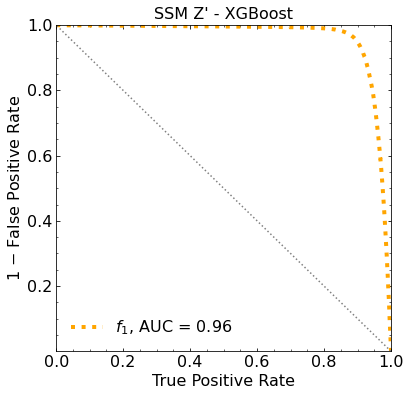


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63600	validation_1-logloss:0.63600
[1]	validation_0-logloss:0.58915	validation_1-logloss:0.58908
[2]	validation_0-logloss:0.55000	validation_1-logloss:0.54993
[3]	validation_0-logloss:0.51653	validation_1-logloss:0.51655
[4]	validation_0-logloss:0.48680	validation_1-logloss:0.48690
[5]	validation_0-logloss:0.45915	validation_1-logloss:0.45935
[6]	validation_0-logloss:0.43687	validation_1-logloss:0.43701
[7]	validation_0-logloss:0.41781	validation_1-logloss:0.41801
[8]	validation_0-logloss:0.40110	validation_1-logloss:0.40129
[9]	validation_0-logloss:0.38608	validation_1-logloss:0.38633
[10]	validation_0-logloss:0.37182	validation_1-logloss:0.37205
[11]	validation_0-logloss:0.35937	validation_1-logloss:0.35964
[12]	validation_0-logloss:0.34876	validation_1-logloss:0.34908
[13]	validation_0-logloss:0.33748	validation_1-logloss:0.33786
[14]	validation_0-logloss:0.32776	validation_1-logloss:0.32816
[15]	validation_0-logloss:0.31822	validation_1-logloss:0.31867
[1

[130]	validation_0-logloss:0.21271	validation_1-logloss:0.21663
[131]	validation_0-logloss:0.21267	validation_1-logloss:0.21662
[132]	validation_0-logloss:0.21263	validation_1-logloss:0.21662
[133]	validation_0-logloss:0.21260	validation_1-logloss:0.21661
[134]	validation_0-logloss:0.21257	validation_1-logloss:0.21660
[135]	validation_0-logloss:0.21251	validation_1-logloss:0.21657
[136]	validation_0-logloss:0.21247	validation_1-logloss:0.21656
[137]	validation_0-logloss:0.21244	validation_1-logloss:0.21656
[138]	validation_0-logloss:0.21240	validation_1-logloss:0.21654
[139]	validation_0-logloss:0.21237	validation_1-logloss:0.21654
[140]	validation_0-logloss:0.21233	validation_1-logloss:0.21654
[141]	validation_0-logloss:0.21230	validation_1-logloss:0.21653
[142]	validation_0-logloss:0.21226	validation_1-logloss:0.21652
[143]	validation_0-logloss:0.21218	validation_1-logloss:0.21649
[144]	validation_0-logloss:0.21215	validation_1-logloss:0.21649
[145]	validation_0-logloss:0.21211	valid

[259]	validation_0-logloss:0.20850	validation_1-logloss:0.21617
[260]	validation_0-logloss:0.20847	validation_1-logloss:0.21618


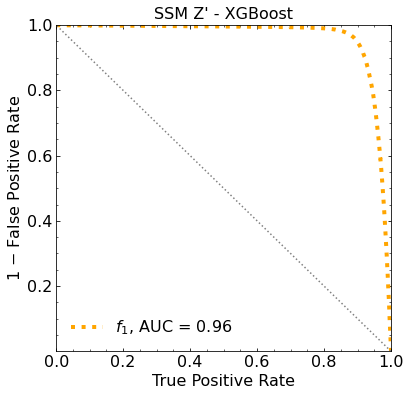


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63619	validation_1-logloss:0.63635
[1]	validation_0-logloss:0.58869	validation_1-logloss:0.58886
[2]	validation_0-logloss:0.54813	validation_1-logloss:0.54825
[3]	validation_0-logloss:0.51460	validation_1-logloss:0.51483
[4]	validation_0-logloss:0.48483	validation_1-logloss:0.48516
[5]	validation_0-logloss:0.45902	validation_1-logloss:0.45931
[6]	validation_0-logloss:0.43722	validation_1-logloss:0.43757
[7]	validation_0-logloss:0.41631	validation_1-logloss:0.41670
[8]	validation_0-logloss:0.39966	validation_1-logloss:0.40010
[9]	validation_0-logloss:0.38417	validation_1-logloss:0.38463
[10]	validation_0-logloss:0.37081	validation_1-logloss:0.37138
[11]	validation_0-logloss:0.35893	validation_1-logloss:0.35941
[12]	validation_0-logloss:0.34661	validation_1-logloss:0.34718
[13]	validation_0-logloss:0.33667	validation_1-logloss:0.33723
[14]	validation_0-logloss:0.32675	validation_1-logloss:0.32734
[15]	validation_0-logloss:0.31918	validation_1-logloss:0.31988
[1

[130]	validation_0-logloss:0.21159	validation_1-logloss:0.21658
[131]	validation_0-logloss:0.21153	validation_1-logloss:0.21657
[132]	validation_0-logloss:0.21149	validation_1-logloss:0.21656
[133]	validation_0-logloss:0.21144	validation_1-logloss:0.21654
[134]	validation_0-logloss:0.21139	validation_1-logloss:0.21654
[135]	validation_0-logloss:0.21134	validation_1-logloss:0.21653
[136]	validation_0-logloss:0.21131	validation_1-logloss:0.21653
[137]	validation_0-logloss:0.21128	validation_1-logloss:0.21652
[138]	validation_0-logloss:0.21124	validation_1-logloss:0.21651
[139]	validation_0-logloss:0.21121	validation_1-logloss:0.21650
[140]	validation_0-logloss:0.21119	validation_1-logloss:0.21651
[141]	validation_0-logloss:0.21115	validation_1-logloss:0.21650
[142]	validation_0-logloss:0.21112	validation_1-logloss:0.21649
[143]	validation_0-logloss:0.21108	validation_1-logloss:0.21649
[144]	validation_0-logloss:0.21106	validation_1-logloss:0.21649
[145]	validation_0-logloss:0.21103	valid

[259]	validation_0-logloss:0.20721	validation_1-logloss:0.21613
[260]	validation_0-logloss:0.20718	validation_1-logloss:0.21613
[261]	validation_0-logloss:0.20717	validation_1-logloss:0.21613
[262]	validation_0-logloss:0.20717	validation_1-logloss:0.21613
[263]	validation_0-logloss:0.20715	validation_1-logloss:0.21613
[264]	validation_0-logloss:0.20711	validation_1-logloss:0.21613
[265]	validation_0-logloss:0.20708	validation_1-logloss:0.21613
[266]	validation_0-logloss:0.20705	validation_1-logloss:0.21613
[267]	validation_0-logloss:0.20702	validation_1-logloss:0.21613
[268]	validation_0-logloss:0.20701	validation_1-logloss:0.21613
[269]	validation_0-logloss:0.20698	validation_1-logloss:0.21613
[270]	validation_0-logloss:0.20697	validation_1-logloss:0.21613
[271]	validation_0-logloss:0.20693	validation_1-logloss:0.21613
[272]	validation_0-logloss:0.20689	validation_1-logloss:0.21614
[273]	validation_0-logloss:0.20686	validation_1-logloss:0.21614
[274]	validation_0-logloss:0.20682	valid

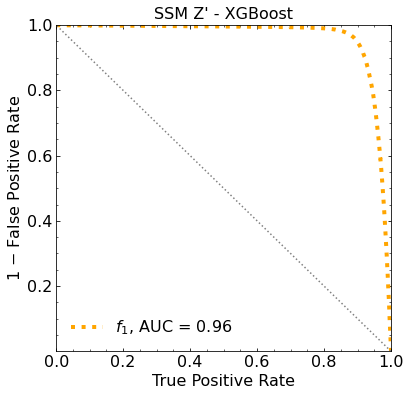


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


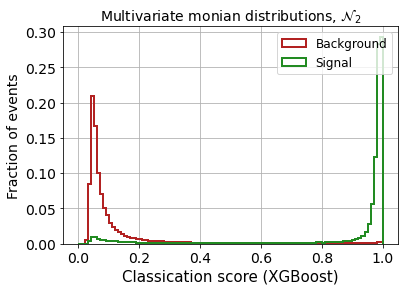

Classification score (10ML):


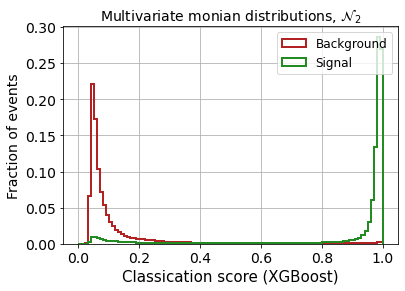

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [4]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]

[2, 5, 8, 12, 25, 37, 50, 125]


### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.30299086866824054
Z_bins_logbins :  0.2772252194410492

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.7335857358890141
Z_bins_logbins :  0.6732814413615386

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  1.1396860267936013
Z_bins_logbins :  1.0487356609732035

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  1.6492293554502424
Z_bins_logbins :  1.5220858883540804

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  3.1166133819454904
Z_bins_logbins :  2.896466052327316

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  4.290494556182966
Z_bins_logbins :  4.005597637294204

In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.30299086866824054, 0.7335857358890141, 1.1396860267936013, 1.6492293554502424, 3.1166133819454904, 4.290494556182966, 5.428034797375353, 10.520592202332985]
[0.2772252194410492, 0.6732814413615386, 1.0487356609732035, 1.5220858883540804, 2.896466052327316, 4.005597637294204, 5.087286927188046, 9.999917604608934]


In [5]:
store_Z_bins = [0.30299086866824054, 0.7335857358890141, 1.1396860267936013, 1.6492293554502424, 3.1166133819454904, 4.290494556182966, 5.428034797375353, 10.520592202332985]

store_Z_bins_logbins = [0.2772252194410492, 0.6732814413615386, 1.0487356609732035, 1.5220858883540804, 2.896466052327316, 4.005597637294204, 5.087286927188046, 9.999917604608934]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


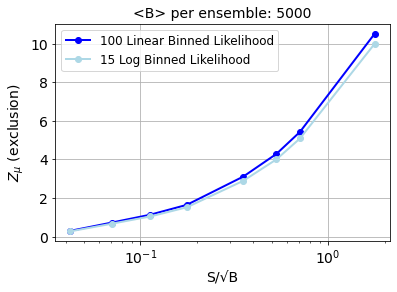

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.25940477344450985
Z_bins_XG_15bins :  0.22649435348304867
Z_bins_XG_15bins_1ML :  0.22509041994397927
Z_bins_XG_15bins_eq :  0.09943657710731904
Z_bins_XG_15bins_eq_1ML :  0.09940710536506372

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.6345048885893735
Z_bins_XG_15bins :  0.557613749027166
Z_bins_XG_15bins_1ML :  0.5542610047844645
Z_bins_XG_15bins_eq :  0.2479207230844724
Z_bins_XG_15bins_eq_1ML :  0.24784744367356656

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.9944665243717022
Z_bins_XG_15bins :  0.8790953414753973
Z_bins_XG_15bins_1ML :  0.8739613601900789
Z_bins_XG_15bins_eq :  0.3956100751790777
Z_bins_XG_15bins_eq_1ML :  0.39549345908874467

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$: 

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.25940477344450985, 0.6345048885893735, 0.9944665243717022, 1.4535714734766283, 2.812579633181119, 3.928945150764326, 5.0279532727348855, 10.060240719933942]
[0.22649435348304867, 0.557613749027166, 0.8790953414753973, 1.2939635326716354, 2.549069321904446, 3.6042916354182535, 4.659245785167646, 9.610544744769872]
[0.22509041994397927, 0.5542610047844645, 0.8739613601900789, 1.2866809559650396, 2.5361891346501726, 3.5875845506498525, 4.639359553609637, 9.58149918403042]
[0.09943657710731904, 0.2479207230844724, 0.3956100751790777, 0.5913120118152309, 1.218025892360674, 1.7844214173426267, 2.385607779852788, 5.633582189876473]
[0.09940710536506372, 0.24784744367356656, 0.39549345908874467, 0.5911383292375921, 1.2176721408456233, 1.783908314940005, 2.38492889439203, 5.6320610697192075]


In [7]:
store_Z_bins_XG = [0.25940477344450985, 0.6345048885893735, 0.9944665243717022, 1.4535714734766283, 2.812579633181119, 3.928945150764326, 5.0279532727348855, 10.060240719933942]

store_Z_bins_XG_15bins = [0.22649435348304867, 0.557613749027166, 0.8790953414753973, 1.2939635326716354, 2.549069321904446, 3.6042916354182535, 4.659245785167646, 9.610544744769872]
store_Z_bins_XG_15bins_1ML = [0.22509041994397927, 0.5542610047844645, 0.8739613601900789, 1.2866809559650396, 2.5361891346501726, 3.5875845506498525, 4.639359553609637, 9.58149918403042]

store_Z_bins_XG_15bins_eq = [0.09943657710731904, 0.2479207230844724, 0.3956100751790777, 0.5913120118152309, 1.218025892360674, 1.7844214173426267, 2.385607779852788, 5.633582189876473]
store_Z_bins_XG_15bins_eq_1ML = [0.09940710536506372, 0.24784744367356656, 0.39549345908874467, 0.5911383292375921, 1.2176721408456233, 1.783908314940005, 2.38492889439203, 5.6320610697192075]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

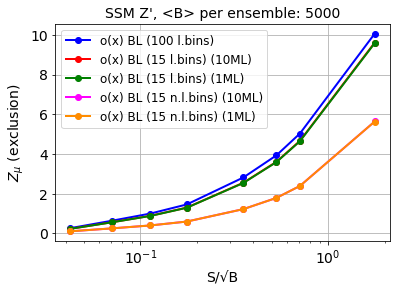

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf 17163.59842658
 17166.64544503 17156.29802239 17111.01498656 16982.51389749
 16692.82729342 16172.17811338 15385.68156716 14305.53627514
 12902.86892342 11159.98101186  9100.45491771  6766.09493176
  4166.3389579   1369.17645882 -1546.4587178  -4510.96389625]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf 21791.80761478 21437.39928471 20934.21708843
 20190.97235362 19092.51953429 17568.84281262 15647.5589606
 13409.87073465 10934.09935031  8291.21881733  5518.04754954
  2643.37810792  -307.66467328 -3210.75280877 -5272.94071909]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0063479219593504735, kernel='epanechnikov')


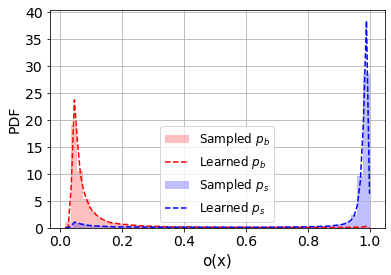


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



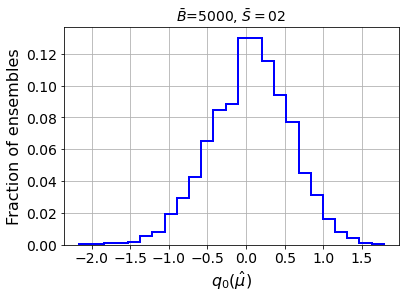

muhat mean:  0.10802689640680815
median q_muhat:  0.07707031338554993
Z_KDE:  0.2776154055263323
Z_KDE mu=0:  0.2776154055263323

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



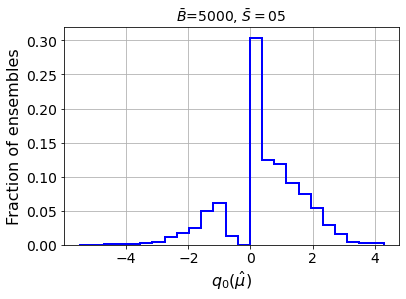

muhat mean:  0.21925583350851383
median q_muhat:  0.4153181743372798
Z_KDE:  0.644451840200088
Z_KDE mu=0:  0.6450333275006856

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



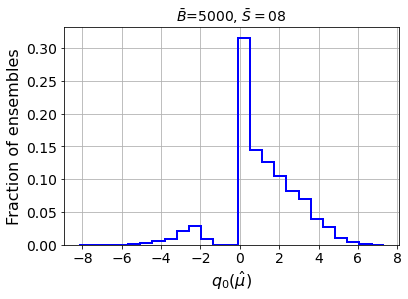

muhat mean:  0.2700441454698339
median q_muhat:  0.9586048080555027
Z_KDE:  0.9790836573324584
Z_KDE mu=0:  0.9822497347175794

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



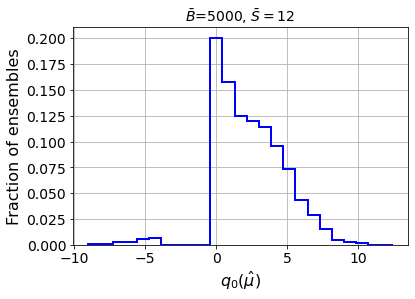

muhat mean:  0.2593231027958797
median q_muhat:  2.14692154448975
Z_KDE:  1.4652377092095843
Z_KDE mu=0:  1.4663915782999024

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



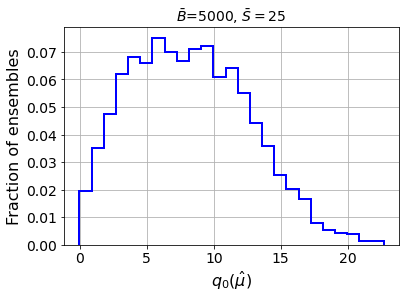

muhat mean:  0.14870608037029245
median q_muhat:  7.991181758119289
Z_KDE:  2.8268678352762246
Z_KDE mu=0:  2.832228756631998

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



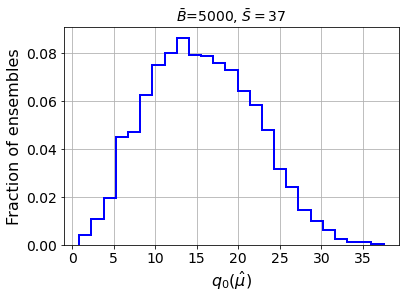

muhat mean:  0.11323931803830772
median q_muhat:  15.328157609199003
Z_KDE:  3.9151191053656342
Z_KDE mu=0:  3.9295960606913574

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



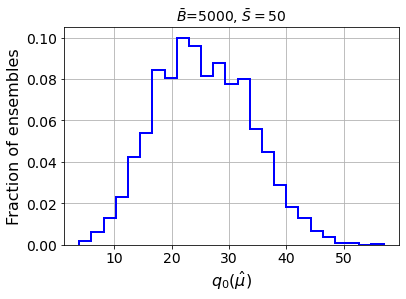

muhat mean:  0.08996634413125788
median q_muhat:  25.11048243660123
Z_KDE:  5.011036064188845
Z_KDE mu=0:  5.0318920096254285

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



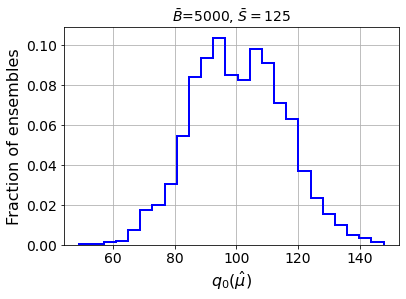

muhat mean:  0.05383642495784148
median q_muhat:  100.39277217491008
Z_KDE:  10.019619362775718
Z_KDE mu=0:  10.058854983368414

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.2776154055263323, 0.644451840200088, 0.9790836573324584, 1.4652377092095843, 2.8268678352762246, 3.9151191053656342, 5.011036064188845, 10.019619362775718]
[0.2776154055263323, 0.6450333275006856, 0.9822497347175794, 1.4663915782999024, 2.832228756631998, 3.9295960606913574, 5.0318920096254285, 10.058854983368414]
[0.10802689640680815, 0.21925583350851383, 0.2700441454698339, 0.2593231027958797, 0.14870608037029245, 0.11323931803830772, 0.08996634413125788, 0.05383642495784148]


In [9]:
store_Z_MLL_KDE = [0.2776154055263323, 0.644451840200088, 0.9790836573324584, 1.4652377092095843, 2.8268678352762246, 3.9151191053656342, 5.011036064188845, 10.019619362775718]
store_Z_MLL_KDE_mu0 = [0.2776154055263323, 0.6450333275006856, 0.9822497347175794, 1.4663915782999024, 2.832228756631998, 3.9295960606913574, 5.0318920096254285, 10.058854983368414]

store_muhat_mean_MLL = [0.10802689640680815, 0.21925583350851383, 0.2700441454698339, 0.2593231027958797, 0.14870608037029245, 0.11323931803830772, 0.08996634413125788, 0.05383642495784148]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf 16767.81359006 16779.5504363
 16782.98731117 16777.60856019 16751.51985814 16666.2335024
 16447.21450218 15998.76735609 15265.9052777  14225.04931184
 12855.39905251 11136.81347116  9086.37096886  6752.50778026
  4159.97476611  1360.28005824 -1555.31366596 -4514.88919825]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf 21666.41775803 21135.75006161
 20344.6400109  19193.40617274 17634.99814433 15691.15367238
 13433.68106008 10943.2866755   8298.87020056  5517.48070371
  2642.52438512  -312.95271882 -3219.17543338 -5280.78628173]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0091866653175426, kernel='epanechnikov')


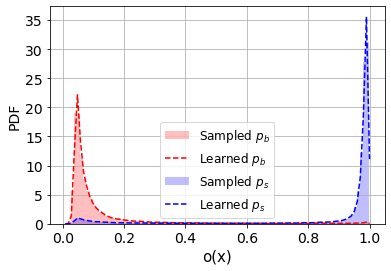


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.2952222983877202

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



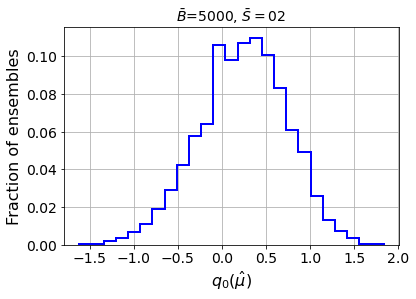

muhat mean:  0.09441059046018072
median q_muhat:  0.26057451325543024
Z_KDE:  0.5104649970913091
Z_KDE mu=0:  0.5104649970913091

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.7112623817820298

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



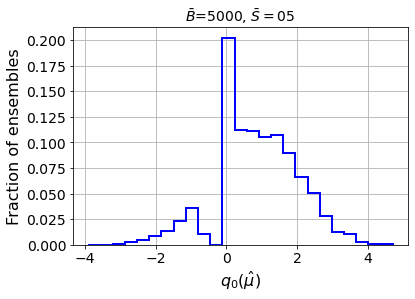

muhat mean:  0.16678578936304392
median q_muhat:  0.8398842765371324
Z_KDE:  0.9164520044918514
Z_KDE mu=0:  0.9164520044918514

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  1.1017945724709297

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



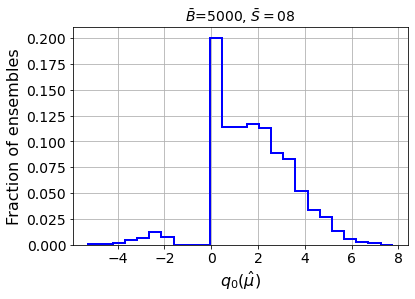

muhat mean:  0.1721673323523229
median q_muhat:  1.7124237164695533
Z_KDE:  1.3085960860668786
Z_KDE mu=0:  1.3085960860668786

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  1.5911293865907359

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



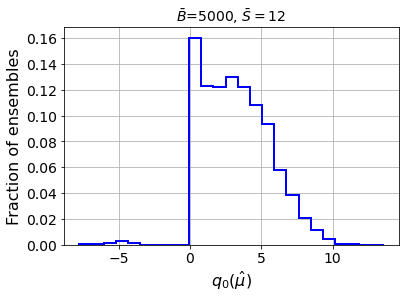

muhat mean:  0.15947025436199286
median q_muhat:  3.079828623297651
Z_KDE:  1.7549440513297427
Z_KDE mu=0:  1.7549440513297427

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  3.0050577190720253

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



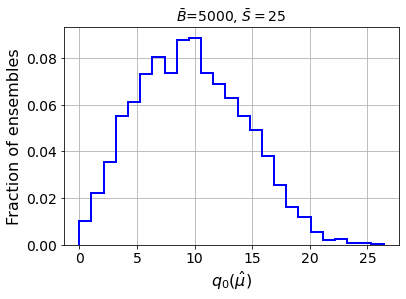

muhat mean:  0.09261519040605934
median q_muhat:  9.523173982782247
Z_KDE:  3.0859640281089225
Z_KDE mu=0:  3.0859640281089225

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  4.145273409380735

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



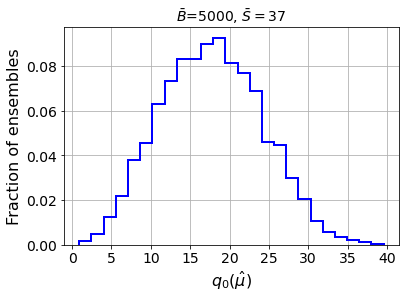

muhat mean:  0.06779625342033256
median q_muhat:  17.682890455366362
Z_KDE:  4.205102906632175
Z_KDE mu=0:  4.205102906632175

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  5.257999023429212

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



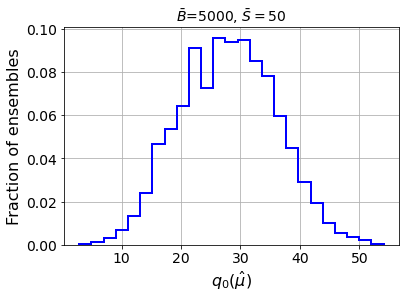

muhat mean:  0.05565839293226757
median q_muhat:  28.06803513035637
Z_KDE:  5.297927437249058
Z_KDE mu=0:  5.297927437249058

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  10.304731822371776

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



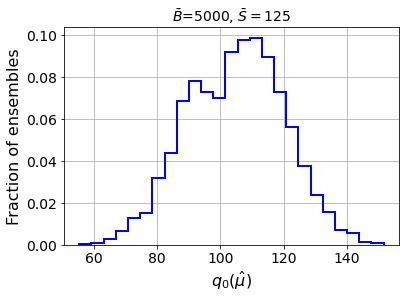

muhat mean:  0.03665682967959528
median q_muhat:  105.65030499581313
Z_KDE:  10.278633420635893
Z_KDE mu=0:  10.279380872448886

 ----------------------------------------- 



In [26]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [27]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.2952222983877202, 0.7112623817820298, 1.1017945724709297, 1.5911293865907359, 3.0050577190720253, 4.145273409380735, 5.257999023429212, 10.304731822371776]
[0.5104649970913091, 0.9164520044918514, 1.3085960860668786, 1.7549440513297427, 3.0859640281089225, 4.205102906632175, 5.297927437249058, 10.278633420635893]
[0.5104649970913091, 0.9164520044918514, 1.3085960860668786, 1.7549440513297427, 3.0859640281089225, 4.205102906632175, 5.297927437249058, 10.279380872448886]
[0.09441059046018072, 0.16678578936304392, 0.1721673323523229, 0.15947025436199286, 0.09261519040605934, 0.06779625342033256, 0.05565839293226757, 0.03665682967959528]


In [10]:
store_Z_KDE_bins = [0.2952222983877202, 0.7112623817820298, 1.1017945724709297, 1.5911293865907359, 3.0050577190720253, 4.145273409380735, 5.257999023429212, 10.304731822371776]

store_Z_MLL_KDE_1ML = [0.5104649970913091, 0.9164520044918514, 1.3085960860668786, 1.7549440513297427, 3.0859640281089225, 4.205102906632175, 5.297927437249058, 10.278633420635893]
store_Z_MLL_KDE_mu0_1ML = [0.5104649970913091, 0.9164520044918514, 1.3085960860668786, 1.7549440513297427, 3.0859640281089225, 4.205102906632175, 5.297927437249058, 10.279380872448886]

store_muhat_mean_MLL_1ML = [0.09441059046018072, 0.16678578936304392, 0.1721673323523229, 0.15947025436199286, 0.09261519040605934, 0.06779625342033256, 0.05565839293226757, 0.03665682967959528]

<ipython-input-11-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-11-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


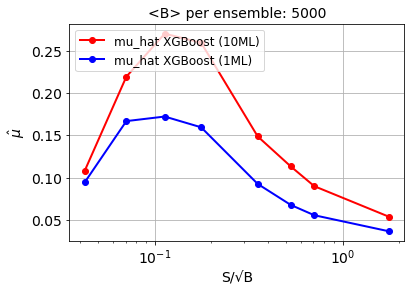

<ipython-input-11-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-11-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

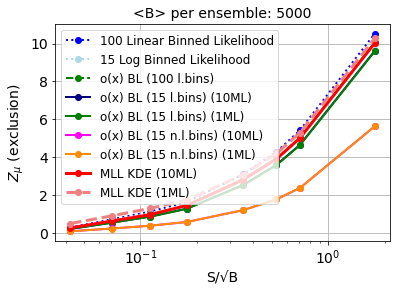

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [12]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.08424989485335783
WP:  0.5     S/B**0.5=  0.12074959250249155
WP:  0.75     S/B**0.5=  0.1599230874945455
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.21062466486656908
WP:  0.5     S/B**0.5=  0.3018738387146535
WP:  0.75     S/B**0.5=  0.39980747600833016
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.33699911690020473
WP:  0.5     S/B**0.5=  0.48299745773295055
WP:  0.75     S/B**0.5=  0.6396907965001486
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.5054979815582938
WP:  0.5     S/B**0.5=  0.7244948181401668
WP:  0.75     S/B**0.5=  0.9595338644586975
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  1.0531179039744647
WP:  0.5     S/B**0.5=  1.509358502271

In [13]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.08424989485335783, 0.21062466486656908, 0.33699911690020473, 0.5054979815582938, 1.0531179039744647, 1.5586171720325068, 2.1062358079489294, 5.265522005673411]
SrootB_WP1_XG = [0.12074959250249155, 0.3018738387146535, 0.48299745773295055, 0.7244948181401668, 1.5093585022717382, 2.2338558579483117, 3.0187170045434764, 7.54664799842304]
SrootB_WP2_XG = [0.1599230874945455, 0.39980747600833016, 0.6396907965001486, 0.9595338644586975, 1.999019174275431, 2.958557359797796, 3.998038348550862, 9.994976405559479]

<ipython-input-14-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-14-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

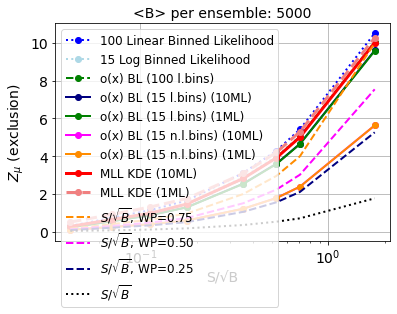

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-15-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


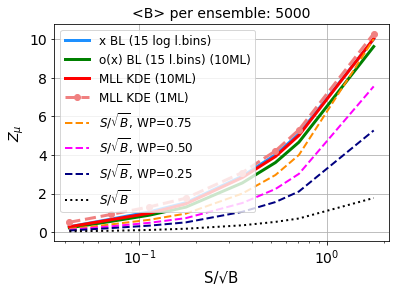

In [15]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

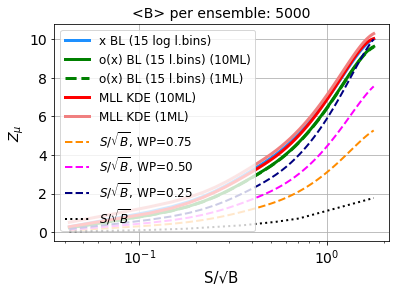

In [16]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [17]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [18]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3106
acceptance_SM = 0.4*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.72851
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)



np.savetxt('saved-models/results4500GeV-mumu.txt', [cross_bins_logbins_95CL,cross_bins_XG_15bins_95CL,cross_XG_MLL_95CL,cross_bins_XG_15bins_1ML_95CL,cross_XG_MLL_1ML_95CL])


correct_factor:  0.44726399999999994

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.19218527165637975 12.475316091236287 4.158438697078762e-06
0.22630946547457842 14.690418739694145 4.8968062465647155e-06
0.19864856810050704 12.894867836471052 4.298289278823684e-06
0.22755805407524252 14.771468329639045 4.923822776546349e-06
0.16007283975934003 10.390802876872234 3.4636009589574116e-06
